In [1]:
#importing necessary libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from matplotlib import pyplot as plt

In [32]:
#loading data
df = pd.read_csv('../4.ML/data.csv')

In [33]:
#displaying data
df.head()

,Label,char_count,word_count,title_word_count,stopword_count,upper_case,subjectivity,polarity,noun_count,conjuction_count,adjective_count,pronoun_count,adverb_count,prepositions_count,verb_count
0,Fake,1169,223,9,38,37,0.262500,-0.025000,68,15,12,32,6,9,54
1,Fake,2291,376,18,57,146,0.462568,0.110800,164,45,31,37,22,9,91
2,Fake,1381,247,11,34,68,0.558531,0.111726,89,24,21,32,5,5,62
3,Fake,503,93,9,23,144,0.476190,0.283036,56,14,1,4,1,0,11
4,Fake,7381,1317,9,86,221,0.434617,0.126710,413,160,94,143,56,35,299


In [34]:
#displaying columns
df.columns

Index(['Label', 'char_count', 'word_count', 'title_word_count',
       'stopword_count', 'upper_case', 'subjectivity', 'polarity',
       'noun_count', 'conjuction_count', 'adjective_count', 'pronoun_count',
       'adverb_count', 'prepositions_count', 'verb_count'],
      dtype='object')

In [50]:
#selecting columns for X, and y
X = df[['char_count', 'word_count', 'title_word_count',
       'stopword_count', 'upper_case', 'subjectivity', 'polarity',
       'noun_count', 'conjuction_count', 'adjective_count', 'pronoun_count',
       'adverb_count', 'prepositions_count', 'verb_count']]
y = df['Label']

In [51]:
#converting target variable to numerical representation
le = preprocessing.LabelEncoder()
y = le.fit_transform(y.astype(str))

In [52]:
#splitting data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
#check training data shape
X_train.shape[1]

14

In [62]:
#building deep neural network model
model = keras.Sequential()
model.add(layers.Dense(4, activation="relu", name="layer1", input_shape = (175,14)))
model.add(layers.Dense(32, activation="relu", name="layer2"))
model.add(layers.Dense(32, activation="relu", name="layer6"))
model.add(layers.Dense(1, activation="sigmoid", name="output"))

In [63]:
#compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
#checking model summary .i.e, layers, no. of parameters
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 175, 4)            60        
_________________________________________________________________
layer2 (Dense)               (None, 175, 32)           160       
_________________________________________________________________
layer6 (Dense)               (None, 175, 32)           1056      
_________________________________________________________________
output (Dense)               (None, 175, 1)            33        
Total params: 1,309
Trainable params: 1,309
Non-trainable params: 0
_________________________________________________________________


In [65]:
#training dnn
history = model.fit(X_train, y_train, epochs=500, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/500
35/35 [==============================] - 3s 26ms/step - loss: 17.3553 - accuracy: 0.3972 - val_loss: 1.9024 - val_accuracy: 0.5000
Epoch 2/500
35/35 [==============================] - 0s 6ms/step - loss: 1.3329 - accuracy: 0.4779 - val_loss: 0.6598 - val_accuracy: 0.5921
Epoch 3/500
35/35 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.4707 - val_loss: 0.6635 - val_accuracy: 0.6184
Epoch 4/500
35/35 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.5441 - val_loss: 0.6564 - val_accuracy: 0.7105
Epoch 5/500
35/35 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.6608 - val_loss: 0.6594 - val_accuracy: 0.6447
Epoch 6/500
35/35 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6174 - val_loss: 0.7100 - val_accuracy: 0.6053
Epoch 7/500
35/35 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.5064 - val_loss: 0.6573 - val_accuracy: 0.6711
Epoch 8/500

Epoch 109/500
35/35 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7691 - val_loss: 0.7059 - val_accuracy: 0.6842
Epoch 110/500
35/35 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.7530 - val_loss: 0.6837 - val_accuracy: 0.6974
Epoch 111/500
35/35 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.7112 - val_loss: 0.7421 - val_accuracy: 0.7237
Epoch 112/500
35/35 [==============================] - 0s 5ms/step - loss: 0.6477 - accuracy: 0.6686 - val_loss: 0.7249 - val_accuracy: 0.6974
Epoch 113/500
35/35 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.7037 - val_loss: 0.6887 - val_accuracy: 0.6842
Epoch 114/500
35/35 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.6904 - val_loss: 0.6892 - val_accuracy: 0.6842
Epoch 115/500
35/35 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7533 - val_loss: 0.7201 - val_accuracy: 0.6053

35/35 [==============================] - 0s 7ms/step - loss: 0.5797 - accuracy: 0.7555 - val_loss: 0.6763 - val_accuracy: 0.6842
Epoch 224/500
35/35 [==============================] - 0s 6ms/step - loss: 0.5114 - accuracy: 0.7138 - val_loss: 0.7225 - val_accuracy: 0.6842
Epoch 225/500
35/35 [==============================] - 0s 6ms/step - loss: 0.4102 - accuracy: 0.7952 - val_loss: 0.6544 - val_accuracy: 0.6974
Epoch 226/500
35/35 [==============================] - 0s 6ms/step - loss: 0.4818 - accuracy: 0.7523 - val_loss: 0.6559 - val_accuracy: 0.6974
Epoch 227/500
35/35 [==============================] - 0s 6ms/step - loss: 0.4968 - accuracy: 0.7260 - val_loss: 0.6183 - val_accuracy: 0.6974
Epoch 228/500
35/35 [==============================] - 0s 6ms/step - loss: 0.5138 - accuracy: 0.7695 - val_loss: 0.6824 - val_accuracy: 0.6974
Epoch 229/500
35/35 [==============================] - 0s 6ms/step - loss: 0.4898 - accuracy: 0.7321 - val_loss: 0.6539 - val_accuracy: 0.6974
Epoch 230/500

35/35 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.7783 - val_loss: 0.6042 - val_accuracy: 0.7368
Epoch 338/500
35/35 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7152 - val_loss: 0.6436 - val_accuracy: 0.7237
Epoch 339/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4887 - accuracy: 0.7712 - val_loss: 0.6448 - val_accuracy: 0.7237
Epoch 340/500
35/35 [==============================] - 0s 5ms/step - loss: 0.5627 - accuracy: 0.7303 - val_loss: 0.6267 - val_accuracy: 0.7105
Epoch 341/500
35/35 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7779 - val_loss: 0.6108 - val_accuracy: 0.7105
Epoch 342/500
35/35 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.7884 - val_loss: 0.6773 - val_accuracy: 0.6974
Epoch 343/500
35/35 [==============================] - 0s 5ms/step - loss: 0.4982 - accuracy: 0.7276 - val_loss: 0.6147 - val_accuracy: 0.7105
Epoch 344/500

35/35 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.7707 - val_loss: 0.5967 - val_accuracy: 0.7237
Epoch 452/500
35/35 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7809 - val_loss: 0.6566 - val_accuracy: 0.6974
Epoch 453/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.7870 - val_loss: 0.5915 - val_accuracy: 0.7237
Epoch 454/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4261 - accuracy: 0.7477 - val_loss: 0.6464 - val_accuracy: 0.6974
Epoch 455/500
35/35 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.7938 - val_loss: 0.7232 - val_accuracy: 0.6842
Epoch 456/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7793 - val_loss: 0.5887 - val_accuracy: 0.7105
Epoch 457/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.7517 - val_loss: 0.6825 - val_accuracy: 0.6974
Epoch 458/500

In [66]:
#checking accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6974
Accuracy: 69.74


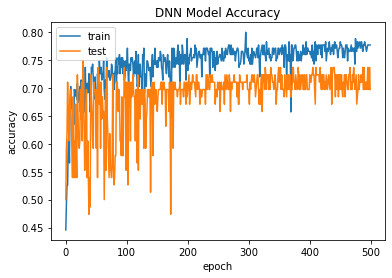

In [67]:
#plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

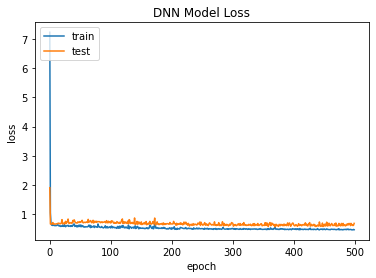

In [68]:
#plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN

In [69]:
# Importing libraries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, AveragePooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [70]:
#loading data
data = pd.read_csv('../3.feature_extractor/feature_extractor.csv')

In [71]:
#selecting target variable
y = data['Label']

In [72]:
#converting target variable to numerical representation
le = preprocessing.LabelEncoder()
y = le.fit_transform(y.astype(str))

In [73]:
#tokenizing the column news, and converting them to sequences
tokenizer = Tokenizer(num_words=7000, lower=True,split=' ')
tokenizer.fit_on_texts(data['News'].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(data['News'].values)

In [74]:
#splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [75]:
# Our dictionary will contain only of the top 7000 words appearing most frequently
top_words = 7000
# Now we split our data-set into training and test data
#(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# Looking at the nature of training data
print(X_train[0])
print(y_train[0])
print('Shape of training data: ')
#print(X_train.shape)
#print(y_train.shape)
print('Shape of test data: ')
#print(X_test.shape)
#print(y_test.shape)

[3555, 235, 11, 85, 150, 1589, 15, 1, 67, 149, 5, 3809, 2031, 137, 11, 480, 26, 13, 57, 474, 172, 30, 2469, 365, 7, 167, 2085, 936, 3172, 130, 4992, 1151, 899, 3048, 2031, 1881, 922, 496, 1, 1101, 238, 770, 4, 1, 3010, 67, 149, 6, 1, 1716, 3, 4446, 132, 4, 877, 338, 35, 248, 1, 92, 122, 204, 153, 496, 548, 101, 2031, 1881, 6, 85, 791, 779, 6, 1, 56, 746, 2, 6, 32, 565, 1583, 761, 6, 2340, 223, 469, 4, 117, 3, 75, 293, 1870, 1575, 5, 791, 202, 522, 1, 2241, 26, 25, 53, 1486, 2, 11, 1, 4638, 30, 1, 157, 964, 132, 1, 1151, 335, 997, 11, 1151, 335, 997, 11, 1, 56, 18, 258, 695, 2031, 1881, 11, 5128, 2441, 13, 18, 2368, 267, 85, 4352, 6, 1, 1151, 157, 964, 2, 894, 85, 4414, 770, 30, 565, 27, 6, 5, 158, 3, 202, 13, 30, 4446, 132, 3649, 1, 899, 2, 950, 23, 5, 1293, 962, 4360, 28, 18, 258, 57, 5, 4624, 839, 15, 47, 553, 67, 18, 183, 1, 899, 4, 1094, 1, 56, 3, 1715, 5, 802, 610, 6, 85, 480, 14, 1071, 440, 86, 22, 5405, 172, 7, 30, 365, 6, 1, 2469, 159, 4, 7, 639, 1, 67, 149, 936, 3172, 24, 899,

In [76]:
# Padding the data samples to a maximum review length in words
max_words = 2500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [77]:
# Building the CNN Model
model = Sequential()      # initilaizing the Sequential nature for CNN model
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(Embedding(top_words, 512, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
#compiling model, and displaying summary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2500, 512)         3584000   
_________________________________________________________________
conv1d (Conv1D)              (None, 2500, 32)          49184     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1250, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1250, 32)          3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 625, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)               

In [79]:
#training cnn model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
2/2 - 4s - loss: 0.6914 - accuracy: 0.4971 - val_loss: 0.6744 - val_accuracy: 0.5526
Epoch 2/20
2/2 - 3s - loss: 0.5893 - accuracy: 0.7600 - val_loss: 0.6538 - val_accuracy: 0.6184
Epoch 3/20
2/2 - 2s - loss: 0.4766 - accuracy: 0.7657 - val_loss: 0.6764 - val_accuracy: 0.6842
Epoch 4/20
2/2 - 2s - loss: 0.4493 - accuracy: 0.7600 - val_loss: 0.7975 - val_accuracy: 0.6184
Epoch 5/20
2/2 - 2s - loss: 0.3847 - accuracy: 0.7886 - val_loss: 0.7259 - val_accuracy: 0.6447
Epoch 6/20
2/2 - 2s - loss: 0.2902 - accuracy: 0.7943 - val_loss: 0.6814 - val_accuracy: 0.6974
Epoch 7/20
2/2 - 3s - loss: 0.2284 - accuracy: 0.8114 - val_loss: 0.6632 - val_accuracy: 0.6579
Epoch 8/20
2/2 - 2s - loss: 0.1217 - accuracy: 0.8971 - val_loss: 0.6984 - val_accuracy: 0.6316
Epoch 9/20
2/2 - 2s - loss: 0.0607 - accuracy: 0.8914 - val_loss: 0.6313 - val_accuracy: 0.6974
Epoch 10/20
2/2 - 2s - loss: -3.9947e-02 - accuracy: 0.9086 - val_loss: 0.6907 - val_accuracy: 0.7368
Epoch 11/20
2/2 - 2s - loss: -1.54

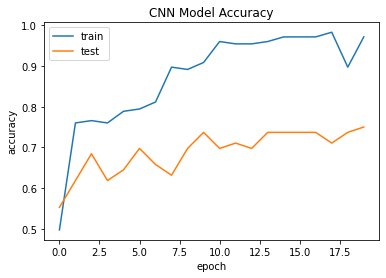

In [81]:
#plotting training and validation accuracy
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

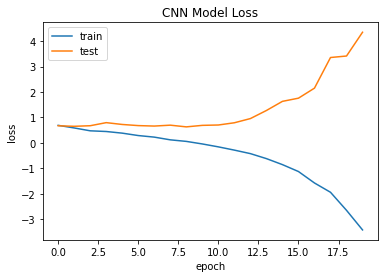

In [82]:
#plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()